In [3]:
import numpy as np
import matplotlib as mpl
import pandas as pd
from numpy.random import multivariate_normal
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import mixture
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons,make_blobs
from sklearn.metrics import accuracy_score

A couple of helper functions we can use:

In [4]:
def sample_2d_gaussian(meanx,meany,variance_x,variance_y,covariance,numsamps):
    '''
    Generates a random sample of size 'numsamps' from a 2-dimensional Gaussian distribution.
    The Gaussian is defined by the mean vector (meanx,meany) and the 
    covariance matrix
    
    variance_x    covariance
    covariance    variance_y
    
    All parameters can be freely chosen, except covariance, which must satisfy the inequality
    
    covariance <= sqrt(variance_x * variance_y)
    '''
    meanvec = np.array([meanx,meany])
    covarmatrix = np.array([[variance_x,covariance],[covariance,variance_y]])
    return multivariate_normal(meanvec,covarmatrix,numsamps)


def maxpos(A):
    '''
    Takes an n x k array A, and returns 1-dim n array where the i'th
    entry is the index of column in A where the i'th row of A has its
    maximal value (application: turns a probabilitiy distribution over
    k classes for n instances into a single prediction)
    '''
    return np.argmax(A,axis=1)
    

### Part 1: Decision regions for simple 2 dimensional datasets

Loading/generating data: following are two alternative ways (A and B) to get data consisting of the input features stored in 'features', and the class labels, stored in 'labels'.  Only execute one of the data generating cells, before moving on to the following code!

**A**: sampling data from 2-dimensional Gaussian distributions. For reproducibility, one can fix a random seed.

In [5]:
#np.random.seed(1)
datasize=250
mixturecoeff=np.array([0.4,0.2,0.4])
componentsizes=(datasize*mixturecoeff).astype(int)

class0samp=sample_2d_gaussian(2,3,0.5,0.5,0.45,componentsizes[0])
class1samp=sample_2d_gaussian(5,3,1.0,0.5,-0.45,componentsizes[1])
class2samp=sample_2d_gaussian(3,2,0.5,0.5,0,componentsizes[2])
  
  
features=np.concatenate((class0samp,class1samp,class2samp),axis=0)
labels=np.concatenate((np.zeros(componentsizes[0]),np.ones(componentsizes[1]),2*np.ones(componentsizes[2])))         

**B**: Loading mi.txt data:

In [6]:
midata = pd.read_csv("MI-labeled.txt", sep=',')
features = np.array(midata[['X1','X2']])
classlabels=midata['Class']
labels = np.zeros(len(classlabels))
for i in range(len(classlabels)):
    if classlabels[i] == 'I':
        labels[i]=1

Plotting the data with labels indicated by color:

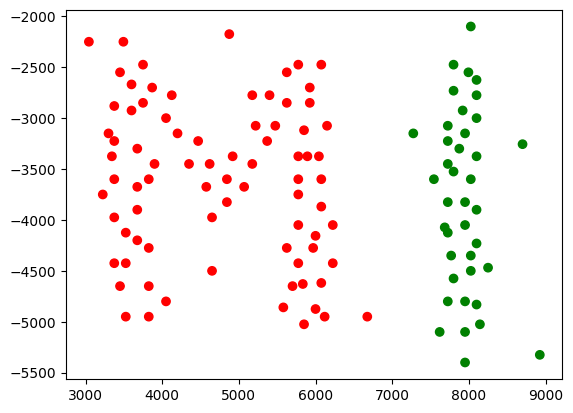

In [7]:
plt.scatter(features[:,0],features[:,1],c=labels, cmap = mpl.colors.ListedColormap(['r', 'b','g']))
plt.show()

Preparing meshgrid for plotting decision regions:

In [11]:
maxvalx = np.max(features[:,0])
maxvaly = np.max(features[:,1])
minvalx = np.min(features[:,0])
minvaly = np.min(features[:,1])
border=2
xinterval = (maxvalx-minvalx)/border
yinterval = (maxvaly-minvaly)/border
xx, yy = np.meshgrid(np.arange(minvalx-xinterval, maxvalx+xinterval, xinterval/100), np.arange(minvaly-yinterval, maxvaly+yinterval, yinterval/100))
      

Learning a classifier -- uncomment to select the classification model to use.

In [12]:
# model=LinearDiscriminantAnalysis()
model = LogisticRegression()
# model = SVC(kernel='linear')

model.fit(features,labels)

LogisticRegression()

Applying model to the meshgrid. All models return a quantitative "likelihood" for the different classes. For the probabilistic models, these are class label probabilities that are retrieved using the `.predict_proba` method. For the non-probabilistic SVC model, this is the `decision_function` method. In all cases, we classify a datapoint as belonging to the class with the maximal "likelihood" value.

In [13]:
Z=model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
#Z=model.decision_function(np.c_[xx.ravel(), yy.ravel()])

meshclasses = maxpos(Z)
# Use the following two lines when Z=model.decision_function() instead of meshclasses = maxpos(Z) 
# meshclasses = np.ones(Z.size)
# meshclasses[Z<0]=0

meshclasses = meshclasses.reshape(xx.shape)

Plotting datapoints and decision regions

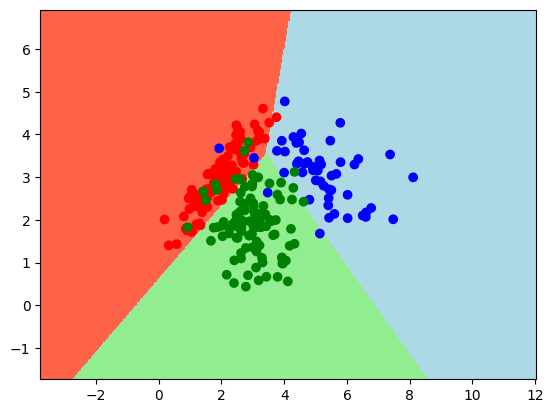

In [14]:
plt.contourf(xx,yy,meshclasses,[-0.1,0.1,1,2],colors=('tomato','lightblue','lightgreen'))
plt.scatter(features[:,0],features[:,1],c=labels, cmap = mpl.colors.ListedColormap(['r', 'b','g']))
#plt.scatter(data[:,0],data[:,1],c=classlabels_numeric, cmap = mpl.colors.ListedColormap(['r', 'b']))
plt.show()

We also calculate the predictions on the (training) datapoints, and check the accuracy:

In [15]:
pred_labels=model.predict(features)
print("Accuracy: {}".format(accuracy_score(labels,pred_labels)))

Accuracy: 0.932


**Exercise 1**: Experiment with the three classifiers Linear Discriminant Analysis, Logistic Regression, and linear support vector machines. Use the MI data, and different mixtures of Gaussians you create by varying the parameters in `sample_2d_gaussian'. 

For the Gaussian mixture data:

Create one or several linearly separable Gaussian mixture datasets (can be with only two components) for which some of the models give a perfect separation of the classes, and others don't (this is related to Exercise 4 in self study 1). 

Create separate test sets using the same parameters for the Gaussian mixture as in the creation of the training set. Can you create a test/train dataset and find classifiers A and B, such that A is better than B on the training data, but B is better than A on the test set? Why is this not such an easy task for the datasets and classifiers we consider her?

For the MI data:

explain the structure of the decision regions you find for the different classifiers.


### Part 2: the California Housing data

We next investigate some "real" data: the California housing dataset contains attributes characterizing houses in different "blocks" of California, and the median house value in these blocks. The usual machine learning problem for this dataset is the regression problem of predicting the median value. We can turn it into a binary prediction problem whether the median value is above the median (of the median values). 

The `fetch_california_housing` function returns the dataset in the form of a dictionary with attributes DESCR, data, and target.

In [ ]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()


print(california_housing['DESCR'])

For a first illustration, we plot the datapoints by geographic coordinates with color coded median house prices:

In [ ]:
plt.scatter(california_housing['data'][:,7],california_housing['data'][:,6],s=1,c=california_housing['target'])
plt.colorbar()
plt.show()

We generate our binary labels, and create a train/test split:

In [ ]:
labels = np.array([1 if y > np.median(california_housing['target']) else 0 for y in california_housing['target']])
features = california_housing['data']
features_train,features_test,labels_train,labels_test = train_test_split(features,labels)

After this discretization the data looks as follows (showing the full data, not train or test splits):

In [ ]:
plt.scatter(california_housing['data'][:,7],california_housing['data'][:,6],s=1,c=labels)
plt.colorbar()
plt.show()

One can directly see that the coordinates are already pretty good predictors, though clearly not allowing for linear separbility. We investigate how good a model we get by using all features and different model classes: 

In [ ]:
# Uncomment one of the following:

model=LinearDiscriminantAnalysis()
#model = LogisticRegression()
#model = SVC(kernel='linear')

model.fit(features_train,labels_train)
pred_labels_train=model.predict(features_train)
pred_labels_test=model.predict(features_test)

print("Accuracy train: {}".format(accuracy_score(labels_train,pred_labels_train)))
print("Accuracy test: {}".format(accuracy_score(labels_test,pred_labels_test)))

**Exercise 2**: Try the different models on the California housing data. Which one is doing best in terms of test accuracy?

Inspect the following attributes of the learned models:


LDA: `means_` <br>
Logistic regression: `coef_` <br>
SVC: `coef_`<br>

Check the online documentation about the meaning of these attributes. How can the values of these attributes be used for explaining the classification model? Which of the input features are most important for the prediction? 

For this investigation it may be helpful to normalize the data before building the classifiers, using the code in the cell below (why is this useful?).



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(features_train)
features_train_norm=scaler.transform(features_train)
features_test_norm=scaler.transform(features_test)
